In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.model_selection import learning_curve


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rayrui/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rayrui/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/rayrui/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rayrui/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rayrui/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rayrui/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/rayrui/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rayrui/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File

AttributeError: _ARRAY_API not found

In [ ]:
Path_to_data = "climate-ds.csv"
data = pd.read_csv(Path_to_data, index_col=['Unnamed: 0'])
data.head(10)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,Albania,Maize,1991,1485,121.0,15.36,29068
7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [ ]:
rows , columns = data.shape

print('There are {} rows and {} columns.'.format(rows,columns))

There are 28242 rows and 7 columns.


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
data.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [ ]:
data.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [ ]:
data["Item"].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [ ]:
df0 = data.loc[data["Item"]=="Potatoes"]
df0.sort_values("average_rain_fall_mm_per_year", inplace=True)
df1 = data.loc[data["Item"]=="Maize"]
df1.sort_values("average_rain_fall_mm_per_year", inplace=True)
df2 = data.loc[data["Item"]=="Wheat"]
df2.sort_values("average_rain_fall_mm_per_year", inplace=True)
df3 = data.loc[data["Item"]=="Rice, paddy"]
df3.sort_values("average_rain_fall_mm_per_year", inplace=True)
df4 = data.loc[data["Item"]=="Soybeans"]
df4.sort_values("average_rain_fall_mm_per_year", inplace=True)
df5 = data.loc[data["Item"]=="Sorghum"]
df5.sort_values("average_rain_fall_mm_per_year", inplace=True)
df6 = data.loc[data["Item"]=="Sweet potatoes"]
df6.sort_values("average_rain_fall_mm_per_year", inplace=True)
df7 = data.loc[data["Item"]=="Cassava"]
df7.sort_values("average_rain_fall_mm_per_year", inplace=True)
df8 = data.loc[data["Item"]=="Yams"]
df8.sort_values("average_rain_fall_mm_per_year", inplace=True)
df9 = data.loc[data["Item"]=="Plantains and others"]
df9.sort_values("average_rain_fall_mm_per_year", inplace=True)

/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/68084169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.sort_values("average_rain_fall_mm_per_year", inplace=True)
/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/68084169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("average_rain_fall_mm_per_year", inplace=True)
/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/68084169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

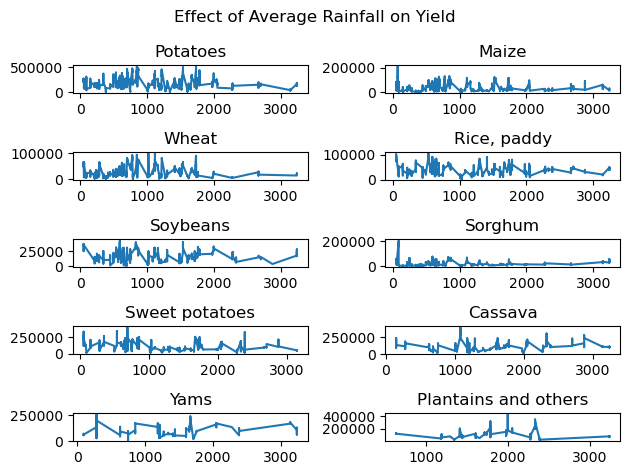

In [ ]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Rainfall on Yield')
axis[0,0].plot(df0["average_rain_fall_mm_per_year"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["average_rain_fall_mm_per_year"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["average_rain_fall_mm_per_year"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["average_rain_fall_mm_per_year"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["average_rain_fall_mm_per_year"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["average_rain_fall_mm_per_year"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["average_rain_fall_mm_per_year"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["average_rain_fall_mm_per_year"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["average_rain_fall_mm_per_year"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["average_rain_fall_mm_per_year"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [ ]:
df0.sort_values("avg_temp", inplace=True)
df1.sort_values("avg_temp", inplace=True)
df2.sort_values("avg_temp", inplace=True)
df3.sort_values("avg_temp", inplace=True)
df4.sort_values("avg_temp", inplace=True)
df5.sort_values("avg_temp", inplace=True)
df6.sort_values("avg_temp", inplace=True)
df7.sort_values("avg_temp", inplace=True)
df8.sort_values("avg_temp", inplace=True)
df9.sort_values("avg_temp", inplace=True)

/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/501804680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.sort_values("avg_temp", inplace=True)
/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/501804680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("avg_temp", inplace=True)
/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/501804680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

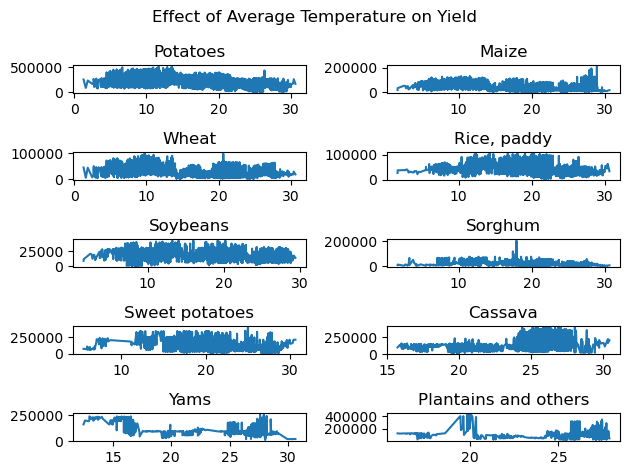

In [ ]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Temperature on Yield')
axis[0,0].plot(df0["avg_temp"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["avg_temp"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["avg_temp"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["avg_temp"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["avg_temp"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["avg_temp"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["avg_temp"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["avg_temp"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["avg_temp"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["avg_temp"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [ ]:
df0.sort_values("pesticides_tonnes", inplace=True)
df1.sort_values("pesticides_tonnes", inplace=True)
df2.sort_values("pesticides_tonnes", inplace=True)
df3.sort_values("pesticides_tonnes", inplace=True)
df4.sort_values("pesticides_tonnes", inplace=True)
df5.sort_values("pesticides_tonnes", inplace=True)
df6.sort_values("pesticides_tonnes", inplace=True)
df7.sort_values("pesticides_tonnes", inplace=True)
df8.sort_values("pesticides_tonnes", inplace=True)
df9.sort_values("pesticides_tonnes", inplace=True)

/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/4173601426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.sort_values("pesticides_tonnes", inplace=True)
/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/4173601426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("pesticides_tonnes", inplace=True)
/var/folders/wc/z093mk4n6gvgl0__bzvth7h80000gn/T/ipykernel_16041/4173601426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

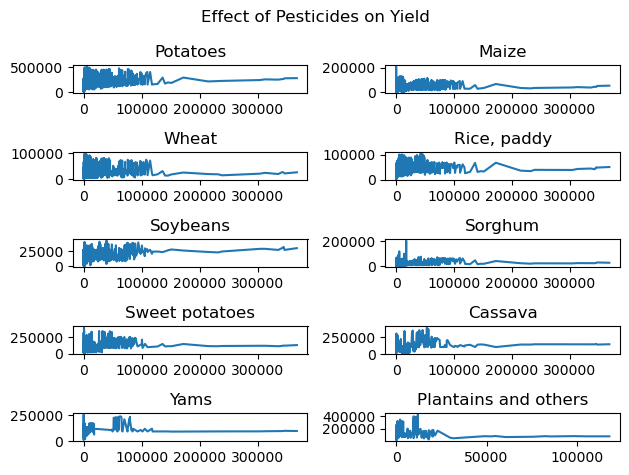

In [ ]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Pesticides on Yield')
axis[0,0].plot(df0["pesticides_tonnes"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["pesticides_tonnes"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["pesticides_tonnes"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["pesticides_tonnes"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["pesticides_tonnes"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["pesticides_tonnes"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["pesticides_tonnes"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["pesticides_tonnes"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["pesticides_tonnes"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["pesticides_tonnes"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(["Year"], axis=1)

In [ ]:
data.head(10)

In [ ]:
data = pd.get_dummies(data, columns=['Area',"Item"])

In [ ]:
data.head(10)

In [ ]:
X = data.loc[:, data.columns != 'hg/ha_yield']
Y = data['hg/ha_yield']

In [ ]:
X.head(10)

In [ ]:
Y.head(10)

In [ ]:
x_max = X.max()
X = X.divide(x_max)
X.describe()

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
chosen_regressors = [
    'RandomForestRegressor',
    'BaggingRegressor',
    'XGBRegressor',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'DecisionTreeRegressor',
    'SGDRegressor',
    'LinearRegression'
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]

In [ ]:
reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

In [ ]:
models

In [1]:
model_rfg = RandomForestRegressor(n_estimators = 100, random_state = 0)

model_rfg.fit(x_train, y_train)
print('Model trained!')

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rfg,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1000, 3000, 7000, 10000, 15000, 18000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

In [ ]:
print('Model score {}'.format(model_rfg.score(x_test, y_test)))

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test["yield_predicted"]= model_rfg.predict(x_test)

In [ ]:
y_test.head(10)

In [ ]:
fig, ax = plt.subplots() 

ax.scatter(y_test["hg/ha_yield"], y_test["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()